[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JamesMTucker/DATA_340_NLP/blob/master/assignment_notebooks/Webscraping.ipynb)

# Webscraping Assignment

Reminder: you are permitted to work with another classmate on this assignment. If you do, please submit a single notebook with both of your names at the top.

## Due date

Friday, February 24 (12:00 pm), 2023

## Assignment description

In this project you will write a Jupyter Notebook or R Markdown file to scrape a selected website. You will need to:

1. Write a function that takes a URL as input and returns the HTML of the page as a string.
2. Inspect the HTML of the page and use regular expressions to extract the documents within the page.
3. Model the documents in a corpus
4. Analyze the corpus using the bag of words model
5. Implement a TF-IDF model to extract the most n-important words for each document in the corpus.

### Objective

This assignment reinforces previous lecture topics on the linguistic background, properties of language, information theory, and Regular Expressions.


## Submission medium

Jupyter Notebook or R Markdown file. See additional instructions at the final section of this document.

## Code Dependencies

You will need to install the following packages:

- `requests`
- `re`
- `beautifulsoup4`
- `nltk`
- `pandas`
- `numpy`
- `matplotlib`


## Grading

This assignment is worth 10 points. (extra credit 1 point to final grade if you create a heatmap of the TF-IDF matrix)

## Write a function that takes a URL as input and returns the HTML of the page as a string

### 1.1 Write a function that takes a URL as input and returns the HTML of the page as a string

In [4]:
import requests

def get_html(url) -> str:
    """Get the HTML of a webpage and return the HTML as a string.
    
    Parameters
    ----------
    url : str
        The URL of the webpage to scrape.
    
    Returns
    -------
    str
        The HTML of the webpage as a string.
    """
    ## YOUR CODE HERE
    return (requests.get(url)).text #adapted and condensed from lecture code


<class 'str'>


True

### 1.2 Inspect the HTML of the page. Can you identify any patterns in the HTML that might be useful for extracting the documents within the page?

In [8]:
# Extract the the HTML source code from the URL (this is the same URL we used in class)
url = "https://www.gutenberg.org/files/1/1-0.txt"

html_source = get_html(url)
#html_source

### 1.3 Use the BeautifulSoup library to create a BeautifulSoup object from the HTML string

In [12]:
from bs4 import BeautifulSoup as bs4
soup = bs4(html_source, 'lxml')

### 1.3 Extract the HTML body text and examine the contents.

In [14]:
# Please explain what the following line of code does in the cell below.
body = soup.find("body")
#body
#this code finds the part of the HTML web page that is tagged as the body and puts it in the body variable. 
#This now contains all of the text and html code that creates the visible information on the webpage.

In [34]:
import re

text = "December, 1979  [Etext #9]\n\nArticle text 1\n\nJanuary, 1980  [Etext #10]\n\nArticle text 2\n\nFebruary, 1980  [Etext #11]\n\nArticle text 3"

articles = re.findall(r"\b\w+,\s+\d+\s+\[Etext\s+#\d+\]\s+(.+?)(?=\b\w+,\s+\d+\s+\[Etext\s+#\d+\]|\Z)", text, re.DOTALL)

print(articles)

['Article text 1\n\n', 'Article text 2\n\n', 'Article text 3']


### 1.4 Use regular expressions to extract the documents within the page

In [50]:
import re

# Your regex here to capture the documents

# Success option 1
doc_extractor = r"\[Etext #\d+\]([\s\S]+?)(?=\[Etext #\d+\]|End of the Project|\*\*\*End)" #taken from lecture notes

# Explain this line of code in the cell below.
# __Note:__ You will need to use the `re.MULTILINE` flag to ensure that the
# regular expression matches across multiple lines.
found_documents: list = re.findall(doc_extractor, body.text, flags=re.MULTILINE)
#found_documents
assert len(found_documents) == 9, "Please check your regex. You should have found a total 9 documents."

## if you are having trouble with the regex remeber that you can use regex101.com to test and debug.
#print(found_documents[8])

#The code above uses a regular expression, stored as doc_extractor, to parse through the body text of the HTML and extract the nine unique articles
#the articles, which each start with [Etext N], are separated and their text is placed into a list of found_documents

Explain: `documents = re.findall(doc_extractor, body.text, re.MULTILINE)`

The code above uses a regular expression, stored as doc_extractor, to parse through the body text of the HTML and extract the nine unique articles
the articles, which each start with [Etext N], are separated and their text is placed into a list of found_documents.

The regular expression used finds each instance of [Etext N] and then collects all text between that tag and either of the next etext tag or the ***End string that appears after the 9th article. 

## 1.5 Explore the contents of the Documents

In the matched documents, you will find a heading appended to the text by project Gutenberg. For the purposes of this assignment, I provided a cleaner function to extract the Gutenberg headings from the text for you.

In [51]:
def clean_gutenberg(text: str) -> str:
    """Clean the text of a Gutenberg document.
    
    Parameters
    ----------
    text : str
        The text of a Gutenberg document.
    
    Returns
    -------
    str
        The cleaned text of the document.
    """
    text = re.sub(r"\[Etext #\d+\]", "", text)
    text = re.sub(r"(\r\n)+", " ", text)
    text = re.sub(r"^ ?The Project Gutenberg.*?Independence\*\*", "", text, flags=re.MULTILINE)
    text = re.sub(r"^ ?\*\*\*\*The Project Gutenberg Etext of The U. S. Bill of Rights\*\*\*\*", "", text, flags=re.MULTILINE)
    text = re.sub(r"^ ?November.*?EST", "", text, flags=re.MULTILINE)
    text = re.sub(r"^ ?\*\*The Project.*?, USA", "", text, flags=re.MULTILINE)
    text = re.sub(r"^ ?\*\*\*\*\*The Project.*?corrections\. \*\*\*", "", text, flags=re.MULTILINE)
    text = re.sub(r"^ ?The Project.*?1775\.", "", text, flags=re.MULTILINE)
    text = re.sub(r"^ ?Officially.*?calendar\]", "", text, flags=re.MULTILINE)
    text = re.sub(r"^ ?\*\*The Project.*?, 1865", "", text, flags=re.MULTILINE)
    text = re.sub(r"^ ?The Project.*?, 1861", "", text, flags=re.MULTILINE)
    
    return text.strip()

In [61]:
test = clean_gutenberg(found_documents[2])
print(test) #figuring out exactly what the cleaner does

We observe today not a victory of party but a celebration of freedom. . . symbolizing an end as well as a beginning. . .signifying renewal as well as change for I have sworn before you and Almighty God the same solemn oath our forbears prescribed nearly a century and three-quarters ago. The world is very different now, for man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forbears fought are still at issue around the globe. . .the belief that the rights of man come not from the generosity of the state but from the hand of God. We dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place. . .to friend and foe alike. . . that the torch has been passed to a new generation of Americans. . . born in this century, tempered by war, disciplined by a hard and bitter peace, proud of our ancient heritage. . .and unwilling to witne

In [73]:
corpus = []

for i, doc in enumerate(found_documents):
    corpus.append(clean_gutenberg(found_documents[i]))
#goes through each item in found documents, runs it through the cleaner, and puts it in the corpus.
len(corpus) #make sure we didnt lose anything!

9

# Analyze the above corpus of documents using TF-IDF

In the follow steps, I would like for you to accomplish the follow preprocessing steps. 

1. Tokenize the documents
2. Lemmatize the tokens
3. Remove stop words
4. Remove punctuation
5. Apply TF-IDF to the corpus
    * You can write a TF-IDF model from sratch or use the `sklearn` library

_tip: see lecture notebooks 4, 5, and 6 for examples of how to work with pandas_


In [74]:
### TIP ###
## if you want to work with pandas create a dataframe with documents as rows and columns for the document number and the text
import pandas as pd
corpus = pd.DataFrame({"docID": range(len(corpus)), "text": corpus})
corpus

,docID,text
0,0,THE DECLARATION OF INDEPENDENCE OF THE UNITED ...
1,1,The United States Bill of Rights. The Ten Orig...
2,2,We observe today not a victory of party but a ...
3,3,"Four score and seven years ago, our fathers br..."
4,4,THE CONSTITUTION OF THE UNITED STATES OF AMERI...
5,5,No man thinks more highly than I do of the pat...
6,6,"In the name of God, Amen. We, whose names are..."
7,7,Fellow countrymen: At this second appearing t...
8,8,Fellow citizens of the United States: in comp...


In [80]:
corpus['text'][0]

"THE DECLARATION OF INDEPENDENCE OF THE UNITED STATES OF AMERICA When in the Course of human events, it becomes necessary for one people to dissolve the political bands which have connected them with another, and to assume, among the Powers of the earth, the separate and equal station to which the Laws of Nature and of Nature's God entitle them, a decent respect to the opinions of mankind requires that they should declare the causes which impel them to the separation. We hold these truths to be self-evident, that all men are created equal, that they are endowed by their Creator with certain unalienable Rights, that among these are Life, Liberty, and the pursuit of Happiness. That to secure these rights, Governments are instituted among Men, deriving their just powers from the consent of the governed, That whenever any Form of Government becomes destructive of these ends, it is the Right of the People to alter or to abolish it, and to institute new Government, laying its foundation on s

## Tokenize the documents

In [98]:
## Your code here
import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokenize_text(text): #go through each document and chop it up into a list of words or punctuation marks
    words = word_tokenize(text)
    words = [w.lower() for w in words]
    return words

tokenized_docs = [] #loop through corpus and apply the tokenizer to make a list of lists of words
for i in range(len(corpus['docID'])):
  tokenized_docs.append(tokenize_text(corpus['text'][i]))
#tokenized_docs[8]

## Lemmatize the tokens

In [101]:
## Your code here
from nltk.stem.porter import *
stemmer = PorterStemmer()

def lemmatize_tokens(tokens): #go through a list of tokens and lemmatize each token according to the imported Porter stemmer
  lemmas = []
  for token in tokens:
    lemmas.append(stemmer.stem(token))
  return lemmas

lemmatized_docs = []
for i in range(len(corpus['docID'])): #go through our tokenized corpus and lemmatize each document, now we have a list of lists of lemmatized words. 
  lemmatized_docs.append(lemmatize_tokens(tokenized_docs[i]))
#lemmatized_docs[8]

## Remove stop words

You can use the `nltk` library to remove stop words. You can also use the `SpaCy` library to remove stopwords.

In [102]:
import string
from nltk.corpus import stopwords

punctuation = list(string.punctuation)
nltk.download('stopwords')
stop_words = stopwords.words('english')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [111]:
#so now lets restart with the original text, tokenize and remove the stopwords, and then lemmatize again.

def tokenize_text_stopwords(text, stops):
    words = word_tokenize(text)
    words = [w.lower() for w in words]
    return [word for word in words if word not in stops and word not in punctuation]

tokenized_docs = [] #loop through corpus and apply the tokenizer and stop remover to make a list of lists of words
for i in range(len(corpus['docID'])):
  tokenized_docs.append(tokenize_text_stopwords(corpus['text'][i], stop_words))
lemmatized_docs = []
for i in range(len(corpus['docID'])): #go through our tokenized corpus and lemmatize each document, now we have a list of lists of lemmatized words. 
  lemmatized_docs.append(lemmatize_tokens(tokenized_docs[i]))

#lemmatized_docs[0]

## Remove punctuation

In [114]:
## I did the above code before seeing this section, so punctuation is already removed!

## Analyze the documents and corpus using TF-IDF

In [139]:
## Using the vectorizer approach seen in lecture 6
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

doc_strings = [' '.join(doc) for doc in lemmatized_docs]
#print(doc_strings)
vectorizer = TfidfVectorizer()
tf_idf_matrix = vectorizer.fit_transform(doc_strings)
tfidf_df = pd.DataFrame(tf_idf_matrix.toarray(), index=[0, 1, 2, 3, 4, 5, 6, 7, 8], columns=vectorizer.get_feature_names_out())
tf_idf_scores = tf_idf_matrix.toarray()
df = tfidf_df.transpose()
#so now we have a dataframe with a row for every word, and columns for tf-idf importance in each document. 

In [132]:
#some analysis
print(df.idxmax()) #the word with the highest tf-idf score from each document. 

0           us
1        shall
2          let
3        dedic
4        state
5          sir
6           mr
7          war
8    constitut
dtype: object


In [136]:
#almost a heatmap
print(df.head(15)) #here is the first 15 alphabetical entries (all numbers) for words in the corpus, with their tf-idf values for each document shown in the table

             0         1         2         3         4         5         6  \
10    0.000000  0.000000  0.000000  0.000000  0.006845  0.000000  0.000000   
15    0.000000  0.060486  0.000000  0.000000  0.000000  0.000000  0.000000   
1620  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.051176   
1774  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1776  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1778  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1787  0.000000  0.000000  0.000000  0.000000  0.005781  0.000000  0.000000   
1789  0.000000  0.060486  0.000000  0.000000  0.000000  0.000000  0.000000   
1791  0.000000  0.060486  0.000000  0.000000  0.000000  0.000000  0.000000   
1972  0.034792  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1974  0.000000  0.000000  0.030384  0.000000  0.000000  0.000000  0.000000   
1975  0.000000  0.000000  0.000000  0.074325  0.005781  0.000000

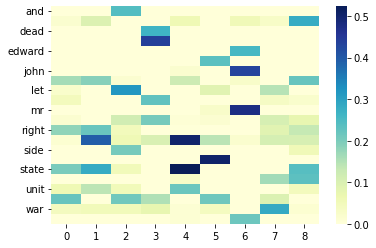

In [144]:
#a real heatmap!
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

significant_words = df.index[df.max(axis=1) >= 0.2] #here we filter our dataframe for only words which, in any document, get above a 0.2 tf-idf score
df_filtered = df.loc[significant_words]
sns.heatmap(df_filtered, cmap='YlGnBu') #make a heatmap of words (index of df) vs their tf-idf scores in each column

plt.show()

# Submission Instructions

Please submit your assignment as a Jupyter Notebook or R Markdown file. You can submit your assignment as a link to a Google Colab notebook or a link to a GitHub repository. If you are submitting a link to a GitHub repository, please make sure that your repository is public. If you email the notebook to me, please zip the file before sending it.

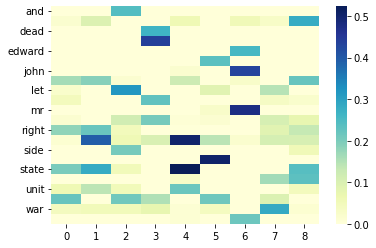